<a href="https://colab.research.google.com/github/mqquiroz/HUCLAM/blob/main/Tiempo_Vaciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Determinación del tamaño de orificio en función de un volumen de descarga y un tiempo de vaciado
## Proyecto HUCLAM 
### Configuración Geométrica del humedal
#### Corrección de Altura efectiva

In [86]:
#Librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt

La altura efectiva del humedal es:  1.0  (m)


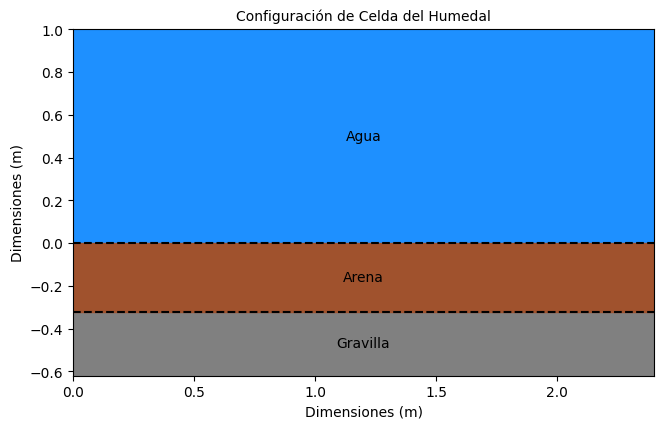

In [104]:
#Geometría simplificada del humedal

#INPUTS
w         = 2.4 # ancho (m)
h_grav    = 0.3 # altura de gravilla (m)
h_humedal = 0.8 # altura del humedal (agua + arena)
A         = 2.4*2.4 # area basal del humedal (m2)
V_agua    = 3 # Volumen de agua a satisfacer (m3) 
n         = 0.4 # Porosidad (-) 

# Calculos
#---------------------
V_aparente  = A*h_humedal # volumen aparente (m3)
V_arena     = n*V_aparente # volumen de arena (m3)
h_arena     = V_arena/A  # Altura de arena (m)
dV_efectivo = V_agua - V_arena # delta de volumen efectivo (m3) 
dh_efectivo = dV_efectivo/A # delta de altura efectiva a corregir (m)

#Dibujo
fig, ax = plt.subplots(1,1,figsize=(7.5,4.5))

x     = np.array([0, w,      w,      0, 0])
x_lin = np.arange(0,w+w/10,w/10)

#gravilla
y_grav = np.array([0, 0, h_grav, h_grav, 0])
#arena
y_arena = np.array([0, 0, h_grav, h_grav, 0])
#agua
y_agua = np.array([0, 0, h_humedal+dh_efectivo, h_humedal+dh_efectivo, 0])

ax.fill_between(x_lin,h_humedal+dh_efectivo,0, color='dodgerblue', alpha=1.0)
ax.fill_between(x_lin,-h_grav-h_arena,-h_arena, color='grey', alpha=1.0)
ax.fill_between(x_lin,-h_arena,0, color='sienna', alpha=1.0)

#ax.plot(x,y_agua,'r')

ax.axhline(y=0, color='k',linestyle="--")
ax.axhline(y=-h_arena, color='k',linestyle="--")
ax.text(w/2,-h_arena/2,'Arena',horizontalalignment='center',verticalalignment='center')
ax.text(w/2,(-h_grav/2)-h_arena,'Gravilla',horizontalalignment='center',verticalalignment='center')
ax.text(w/2,(h_humedal+dh_efectivo)/2,'Agua',horizontalalignment='center',verticalalignment='center')

ax.set_xlabel('Dimensiones (m)',fontsize=10)
ax.set_ylabel('Dimensiones (m)',fontsize=10)
ax.set_title('Configuración de Celda del Humedal',fontsize=10)
ax.set_xlim(0,w)
ax.set_ylim(-h_grav-h_arena,h_humedal+dh_efectivo)


print('La altura efectiva del humedal es: ',np.round(h_humedal+dh_efectivo,2),' (m)')

plt.show()

### Tiempo de vaciado de un tanque a través de un orificio en su parte inferior
#### Desarrollo Teórico



Dejaremos: 

$A$: Área del tanque (o estanque) 

$a$: Área del orificio 
$H_{1}$: Altura Inicial del líquido en el tanque

$H_{2}$: Altura final del líquido en el tanque 

Volumen del líquido dejando el tanque en un tiempo $dt$: 

$$ = A\times dh$$

Velocidad teórica del agua a través del orificio:

$$ U = \sqrt{2gh} $$

Descarga: 

$$ Q = C_{d}\cdot a \cdot U = C_{d}\cdot a \cdot \sqrt{2gh} $$

Aquí $C_{d}$ es un coeficiente de descarga. Su valor es dependiente de la configuración de la salida (orificio). Para flujo turbulento, y considerando un borde afilado (sharp-edged) el valor aproximado es de 0.62, mientras que para un borde redondeado (round-edged) es de 0.98.

Descarga en un tiempo $dt$: 

$$ C_{d}\cdot a \cdot \sqrt{2gh} \cdot dt $$

Entonces, el volumen del líquido dejando el tanque debe ser igual al volumen de líquido fluyendo a través del orificio:

$$ - A\cdot dh = C_{d}\cdot a \cdot \sqrt{2gh} \cdot dt $$

Reordenando y despejando para $dt$: 

$$ dt = \frac{- A\cdot dh}{C_{d}\cdot a \cdot \sqrt{2gh}} = \frac{- A\cdot 
 h^{-1/2}}{C_{d}\cdot a \cdot \sqrt{2g}} dh $$

Se puede encontrar el tiempo total integrando: 

$$ t = \int_{H_{1}}^{H_{2}} dt = \frac{-A}{C_{d}\cdot a \cdot \sqrt{2g}} \int_{H_{1}}^{H_{2}} h^{-1/2} dh $$

Resolviendo: 

$$ t = \frac{-A}{C_{d}\cdot a \cdot \sqrt{2g}} \left[2h^{1/2} \right]_{H_{1}}^{H_{2}}  = \frac{-2A}{C_{d}\cdot a \cdot \sqrt{2g}} \left[H_{2}^{1/2} - H_{1}^{1/2}\right]$$

Luego:

$$ t = \frac{2A}{C_{d}\cdot a \cdot \sqrt{2g}} \left[H_{1}^{1/2} - H_{2}^{1/2}\right] = \frac{2A}{C_{d}\cdot a \cdot \sqrt{2g}} \left[\sqrt{H_{1}} - \sqrt{H_{2}}\right] $$

Si se requiere conocer el tiempo en el que el estanque queda vacío, sólo basta con asumir $H_{2} = 0$, así:

$$ t_{vaciado} = \frac{2A \sqrt{H_{1}}}{C_{d}\cdot a \cdot \sqrt{2g}}$$

Por otro lado, si se conoce el tiempo de vaciado y se requiere calcular las dimensiones del orificio, para una geomtería circular con $a = \displaystyle\frac{\pi d_{ori}^{2}}{4}$:

$$ d_{ori} = \sqrt{\frac{8A \sqrt{H_{1}}}{\pi\cdot t_{vaciado}\cdot C_{d} \cdot \sqrt{2g}}} $$

Esto es, el diámetro requerido de un orificio circular para satisfacer el tiempo de vaciado, $t_{vaciado}$, desde una altura inicial de agua $H_{1}$


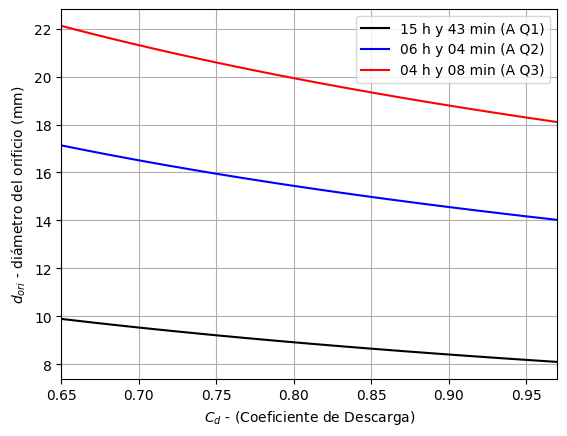

Los diámetros mínimos a utilizar son: 
8.0  (mm)  para (A Q1)
14.0  (mm)  para (A Q2)
18.0  (mm)  para (A Q3)


In [105]:
# Entrada de Datos
A = 2.4*2.4 # Área basal del tanque rectangular (m2)
H1 = 1.00   # Nivel del estanque (m)
Cd = np.arange(0.65,0.98,0.01) # Rango de Coeficientes de descarga (-)

t_v = np.array([943, 364, 248]) # Tiempos de vaciado (min)
t_v = np.array([(14*60)+43 ,(6*60)+4 ,(4*60)+8]) # Tiempos de vaciado (min)
t_v = np.array([14.4675926 ,4.82253086 ,2.89351852]) # Tiempos de vaciado (horas)
# 15 hrs (900 min) y 43 min
#  6 hrs (360 min) y  4 min
#  4 hrs (240 min) y  8 min 

##############################################
#Cálculos
g = 9.81 # aceleración de gravedad (m/s2)
t_v = t_v*60*60 #(en segundos)

d_ori= np.zeros((len(t_v),len(Cd)))

for i in range(len(t_v)): 
  d_ori[i,:] = np.sqrt(8*A*np.sqrt(H1) / (np.pi*t_v[i]*Cd*np.sqrt(2*g)) )


plt.plot(Cd,d_ori[0,:]*1000,'k',label='15 h y 43 min (A Q1)')
plt.plot(Cd,d_ori[1,:]*1000,'b',label='06 h y 04 min (A Q2)')
plt.plot(Cd,d_ori[2,:]*1000,'r',label='04 h y 08 min (A Q3)')
plt.xlabel('$C_{d}$ - (Coeficiente de Descarga)')
plt.ylabel('$d_{ori}$ - diámetro del orificio (mm)')
plt.grid()
plt.xlim(Cd[0],Cd[-1])
plt.legend()
plt.show()

print('Los diámetros mínimos a utilizar son: ')
print(np.round(d_ori[0,-1]*1000,0),' (mm)',' para (A Q1)')
print(np.round(d_ori[1,-1]*1000,0),' (mm)',' para (A Q2)')
print(np.round(d_ori[2,-1]*1000,0),' (mm)',' para (A Q3)')